In [28]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/movies-dataset-from-piracy-website/movies_dataset.csv


先看一下数据中的各类属性：

In [29]:
import numpy as np
import pandas as pd
import re
mov_data = pd.read_csv('/kaggle/input/movies-dataset-from-piracy-website/movies_dataset.csv')
mov_data.columns

Index(['Unnamed: 0', 'IMDb-rating', 'appropriate_for', 'director', 'downloads',
       'id', 'industry', 'language', 'posted_date', 'release_date', 'run_time',
       'storyline', 'title', 'views', 'writer'],
      dtype='object')

能看到出现了一个无用的属性类型Unamed:0，将其删除

In [30]:
mov_data = mov_data.drop(columns='Unnamed: 0')
mov_data = mov_data.drop_duplicates()
mov_data.columns

Index(['IMDb-rating', 'appropriate_for', 'director', 'downloads', 'id',
       'industry', 'language', 'posted_date', 'release_date', 'run_time',
       'storyline', 'title', 'views', 'writer'],
      dtype='object')

统计一下所有属性中的数据类型，不同值的数量，空值占比。我将其中的run_time由object类型转换为了float64类型。

In [31]:
cols, dtype, specimens, num_unique, null_share = [], [], [], [], []

for i, col in enumerate(mov_data['run_time']):
#     print(type(col))
    if(type(col) == str and 'h' in col):
        li = re.split('h|min|m| ',col)
        li = list(filter(None, li))
        mov_data.loc[i,'run_time'] = float(li[0])*60
        if(len(li) >1):
            mov_data.loc[i,'run_time'] += float(li[1])
    elif(type(col)== str and ('min' in col or 'm' in col) ):
        li = re.split('h|min|m| ',col)
        li = list(filter(None, li))
        mov_data.loc[i,'run_time'] = float(li[0])
#         mov_data['run_time'][i] = float(li[0])*60+float(li[2])
mov_data['run_time'] = mov_data['run_time'].astype(float)

for col in 'downloads', 'views':
    mov_data[col] = mov_data[col].str.replace(',','')
#     if('.' in mov_data[col]):
#         print("yes")
    mov_data[col] = mov_data[col].astype(float)

mov_data['id'] = mov_data['id'].astype(str)

for column in mov_data:
    cols.append(column)
    col_dtype = mov_data[column].dtype
    dtype.append(col_dtype)

    specimen = mov_data.loc[mov_data[column].first_valid_index(), column]
    specimens.append(specimen)

    num_unique.append(mov_data[column].nunique())

    null_sum = mov_data[column].isna().sum()
    null_to_len = null_sum / len(mov_data[column])
    null_share.append(f'{null_to_len:.2%}')

df = pd.DataFrame(list(zip(dtype, specimens, num_unique, null_share)), index=cols)    
df.columns=['dtype', 'eg.', 'num_unique', 'null_share']

print(df)


                   dtype                                                eg.  \
IMDb-rating      float64                                                4.8   
appropriate_for   object                                                  R   
director          object                                          John Swab   
downloads        float64                                              304.0   
id                object                                             372092   
industry          object                                Hollywood / English   
language          object                                            English   
posted_date       object                                       20 Feb, 2023   
release_date      object                                        Jan 28 2023   
run_time         float64                                              105.0   
storyline         object  Doc\r\n facilitates a fragile truce between th...   
title             object                            

# 对于属性的频数统计

对于属性id的频数统计

In [32]:
mov_data['id'].value_counts()

id
372090    402
371744    402
371877    402
372092    202
371991    202
         ... 
303381      1
303380      1
303379      1
303377      1
30459       1
Name: count, Length: 17086, dtype: int64

对于属性title的频数统计

In [33]:
mov_data['title'].value_counts()

title
The Girl Who Escaped: The Kara Robinson Story    402
Vaathi                                           402
Who Invited Charlie?                             402
Little Dixie                                     202
The Inspection                                   202
                                                ... 
Kesari                                             1
Old Boys                                           1
American Exit                                      1
Adventures of Aladdin                              1
Madhumati                                          1
Name: count, Length: 16572, dtype: int64

对于属性storyline的频数统计

In [34]:
mov_data['storyline'].value_counts()

storyline
The life of a young man and his struggles against the privatization of education.                                                                                                                                                                                                                                                                                                                                                                                                    402
Follows\r\n a New York City family hiding out in the Hamptons whose bubble is \r\npopped when a Bloody Mary-swilling, pot-smoking 'Charlie' comes to bring\r\n a lifetime of hurt that might heal them all.                                                                                                                                                                                                                                                                          402
It follows Kara Robinson as she survives an 

对于属性appropriate_for的频数统计

In [35]:
mov_data['appropriate_for'].value_counts()

appropriate_for
R                 4384
Not Rated         2142
PG-13             1968
PG                 886
TV-14              694
TV-MA              406
G                  152
Unrated            132
TV-PG              115
TV-G                99
TV-Y7               45
TV-Y                25
Approved             9
NC-17                4
TV-Y7-FV             3
Passed               3
MA-17                1
TV-13                1
Drama                1
Drama, Romance       1
18+                  1
Name: count, dtype: int64

对于属性language的频数统计

In [36]:
mov_data['language'].value_counts()

language
English                                 12657
Hindi                                    2558
English,Spanish                           391
Punjabi                                   310
English,Hindi                             304
                                        ...  
English,Korean,Spanish                      1
Norwegian,Swedish                           1
Spanish,Chinese,English,Maori,French        1
Urdu,Punjabi,English                        1
Spanish,German,English                      1
Name: count, Length: 1167, dtype: int64

对于属性industry的频数统计

In [37]:
mov_data['industry'].value_counts()

industry
Hollywood / English    14649
Bollywood / Indian      2645
Tollywood               1172
Anime / Kids            1049
Wrestling                433
Punjabi                  332
Stage shows              129
Pakistani                 92
Dub / Dual Audio          45
3D Movies                  1
Name: count, dtype: int64

对于属性posted_date的频数统计

In [38]:
mov_data['posted_date'].value_counts()

posted_date
13 Feb, 2023    812
20 Feb, 2023    607
15 Feb, 2023    607
10 Feb, 2023    485
16 Feb, 2023    406
               ... 
12 Sep, 2009      1
08 Sep, 2009      1
01 Sep, 2009      1
18 Aug, 2009      1
30 Nov, 2011      1
Name: count, Length: 4123, dtype: int64

对于属性release_date的频数统计

In [39]:
mov_data['release_date'].value_counts()

release_date
Jan 01 1970    962
Feb 03 2023    616
Feb 17 2023    607
Feb 10 2023    410
Feb 11 2023    402
              ... 
Sep 05 2003      1
Dec 29 2022      1
Aug 24 2013      1
Jan 12 2014      1
Mar 28 1958      1
Name: count, Length: 4886, dtype: int64

对于属性director的频数统计

In [40]:
mov_data['director'].value_counts()

director
Venky Atluri                                  405
Simone Stock                                  403
Xavier Manrique                               403
John Swab                                     205
Neil Jordan                                   205
                                             ... 
Agnieszka Smoczynska                            1
Dylan Thomas Ellis                              1
Sunil Thakur, Sunil Dhawan, Shivani Thakur      1
Suman Mukhopadhyay                              1
Shea Sizemore                                   1
Name: count, Length: 9672, dtype: int64

对于属性writer的频数统计

In [41]:
mov_data['writer'].value_counts()

writer
Nicholas Schutt                           403
Venky Atluri                              402
Haley Harris                              402
John Swab                                 205
Elegance Bratton                          202
                                         ... 
Barbara Samuels, Joseph Boyden              1
Maria Allred                                1
Pia Mechler                                 1
Paul Flannery, David Ryan Keith             1
Khwaja Ahmad Abbas, Khwaja Ahmad Abbas      1
Name: count, Length: 13603, dtype: int64

# 数值属性分析

对IMDb-rating downloads run_time views进行数值属性分析，得到五数统计和空值数量

In [42]:
# 对IMDb-rating downloads run_time views进行数值属性分析
numeric_mov_data = pd.DataFrame(mov_data, columns=['views', 'downloads', 'IMDb-rating','run_time'])
five_des = numeric_mov_data.describe().loc[['max', '75%', '50%', '25%', 'min']]

NaN_counts = numeric_mov_data.isna().sum()
NaN_counts = pd.DataFrame(NaN_counts, columns=['NaN_counts']).T

print(pd.concat([five_des,NaN_counts],axis=0))

                views  downloads  IMDb-rating  run_time
max         1638533.0   391272.0          9.9     321.0
75%           36571.0    10070.0          6.6     117.0
50%           15222.0     2716.0          5.7     100.0
25%            7571.5      855.5          4.8      90.0
min             667.0        0.0          1.1       2.0
NaN_counts        1.0        1.0        841.0    1768.0


所有标称属性的直方图，取值过多的属性只取前二十个作图

In [43]:
import matplotlib.pyplot as plt
def draw_barh(col_name,ylabel,xlabel,title,limit=None):
    mov_data[col_name].value_counts()
    appropriate_count = pd.DataFrame(mov_data[col_name].value_counts()).rename\
    (columns={col_name: 'a_count'})
    appropriate_count.columns.values
    
    if(limit!=None):
        plt.barh(appropriate_count.index[0:limit], appropriate_count['count'][0:limit])
    else:
        plt.barh(appropriate_count.index, appropriate_count['count'])
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)
    plt.title(title)
    plt.show()


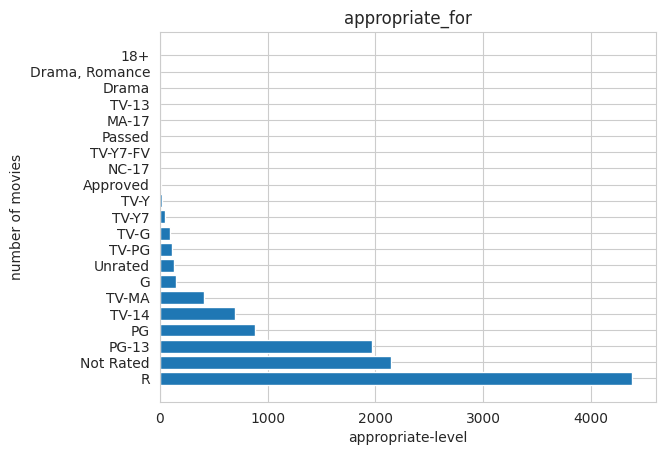

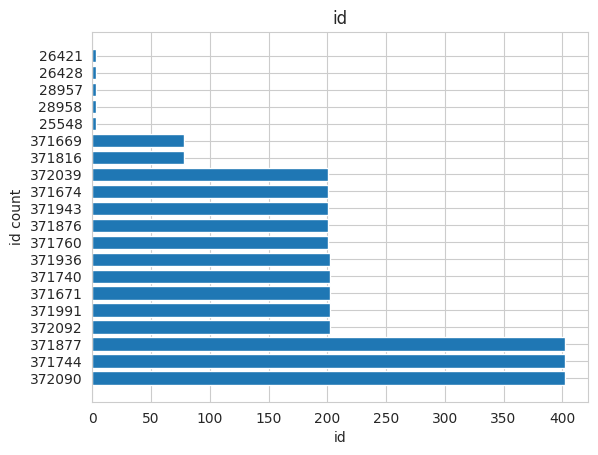

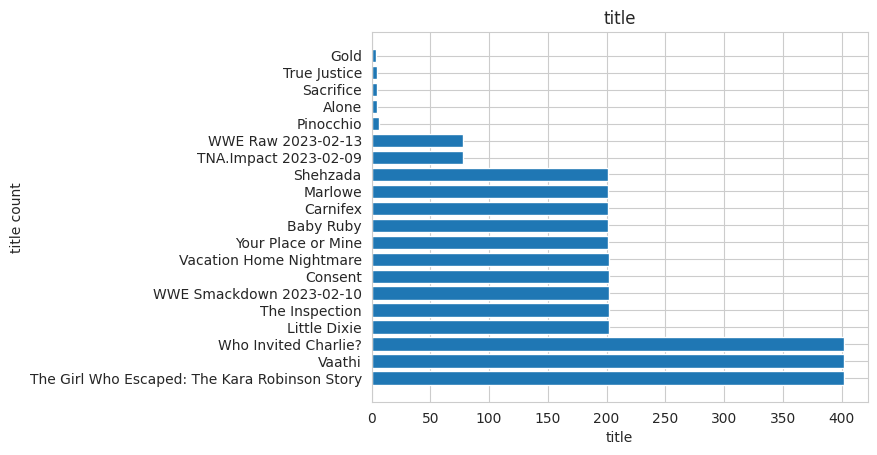

) missing from current font.te-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 13 (
  fig.canvas.print_figure(bytes_io, **kw)


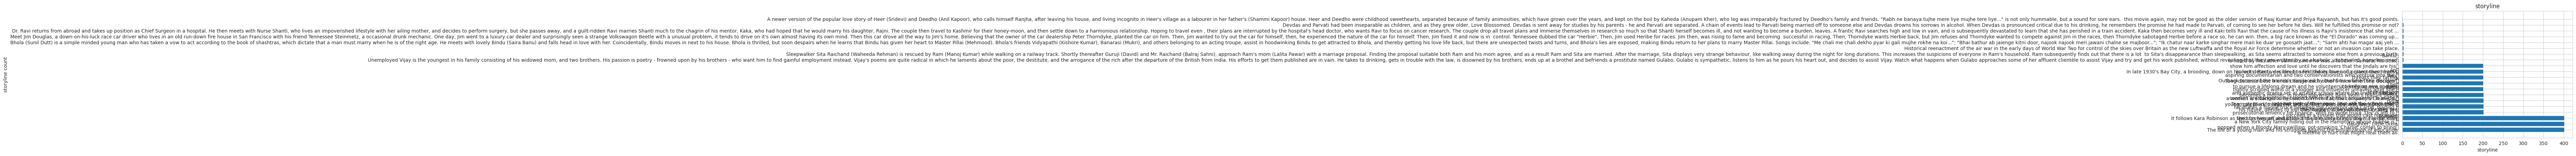

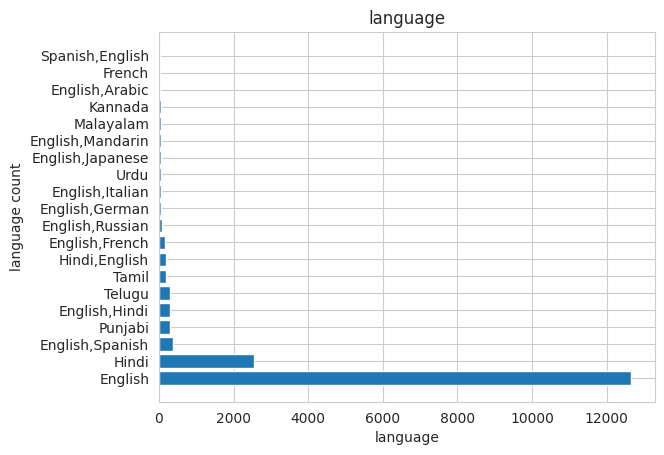

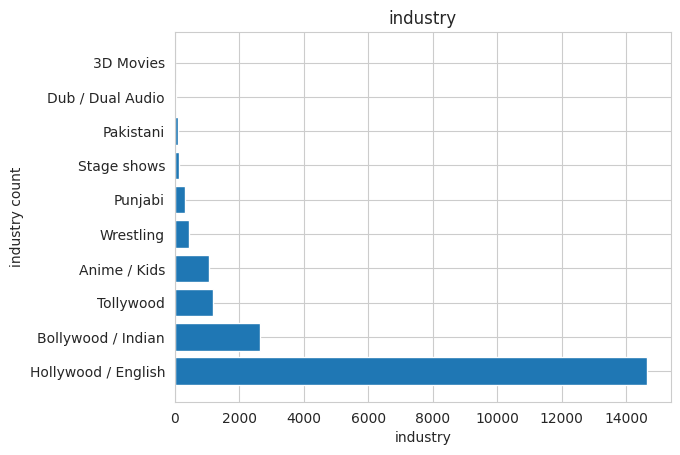

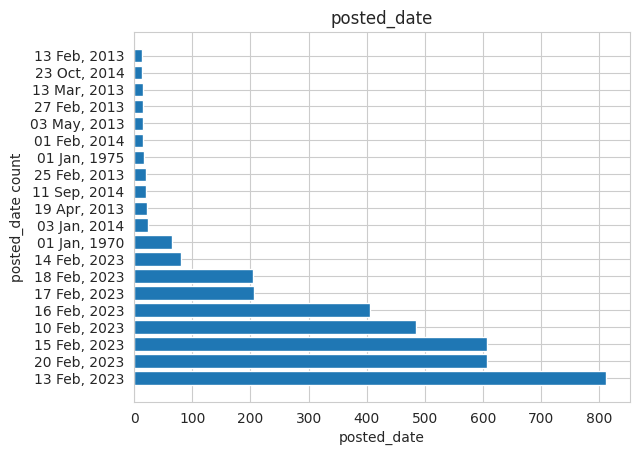

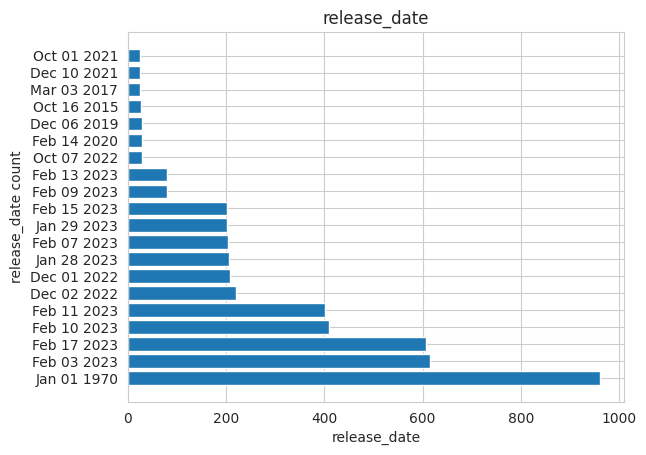

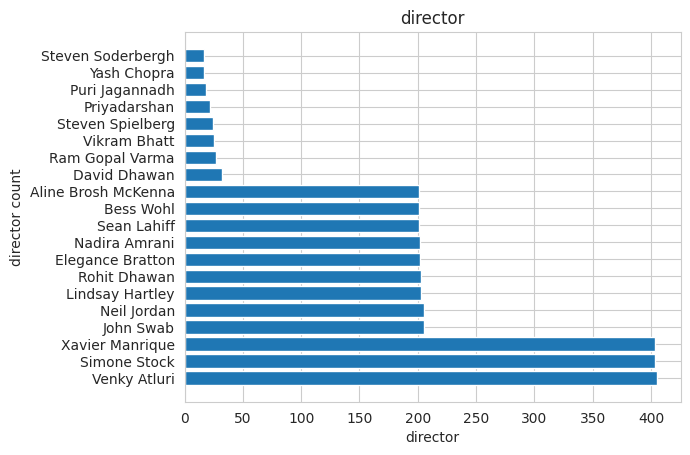

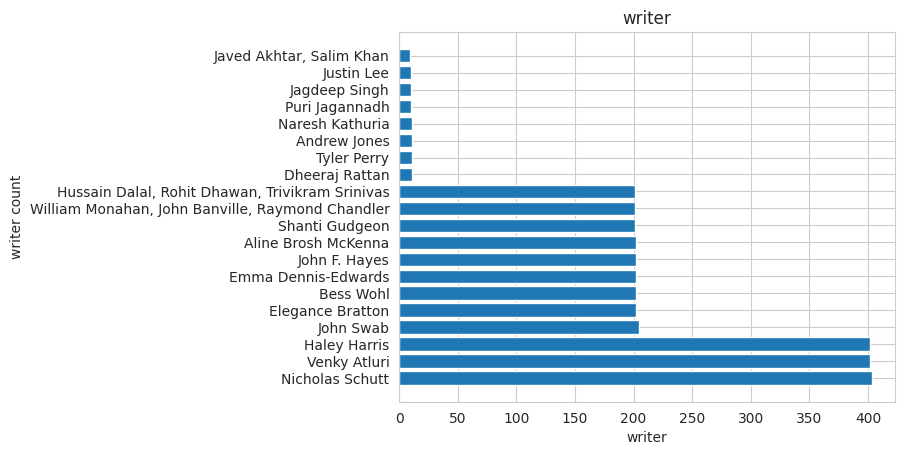

In [44]:
# 所有标称属性的直方图，取值过多的属性只取前二十个作图
draw_barh('appropriate_for','number of movies','appropriate-level','appropriate_for')
draw_barh('id','id count','id','id',20)
draw_barh('title','title count','title','title',20)
draw_barh('storyline','storyline count','storyline','storyline',20)
draw_barh('language','language count','language','language',20)
draw_barh('industry','industry count','industry','industry')
draw_barh('posted_date','posted_date count','posted_date','posted_date',20)
draw_barh('release_date','release_date count','release_date','release_date',20)
draw_barh('director','director count','director','director',20)
draw_barh('writer','writer count','writer','writer',20)

# mov_data['id'].value_counts()
# id_count = pd.DataFrame(mov_data['id'].value_counts()).rename\
# (columns={'id': 'id_count'})
# id_count.sort_values(by='count', ascending=True)
# # id_count
# plt.barh(id_count.index[0:20],id_count['count'][0:20])
# plt.ylabel('id')
# plt.xlabel('id count')
# plt.title('id')
# plt.show()

对IMDb-rating downloads run_time views进行数值属性分析，绘制箱型图

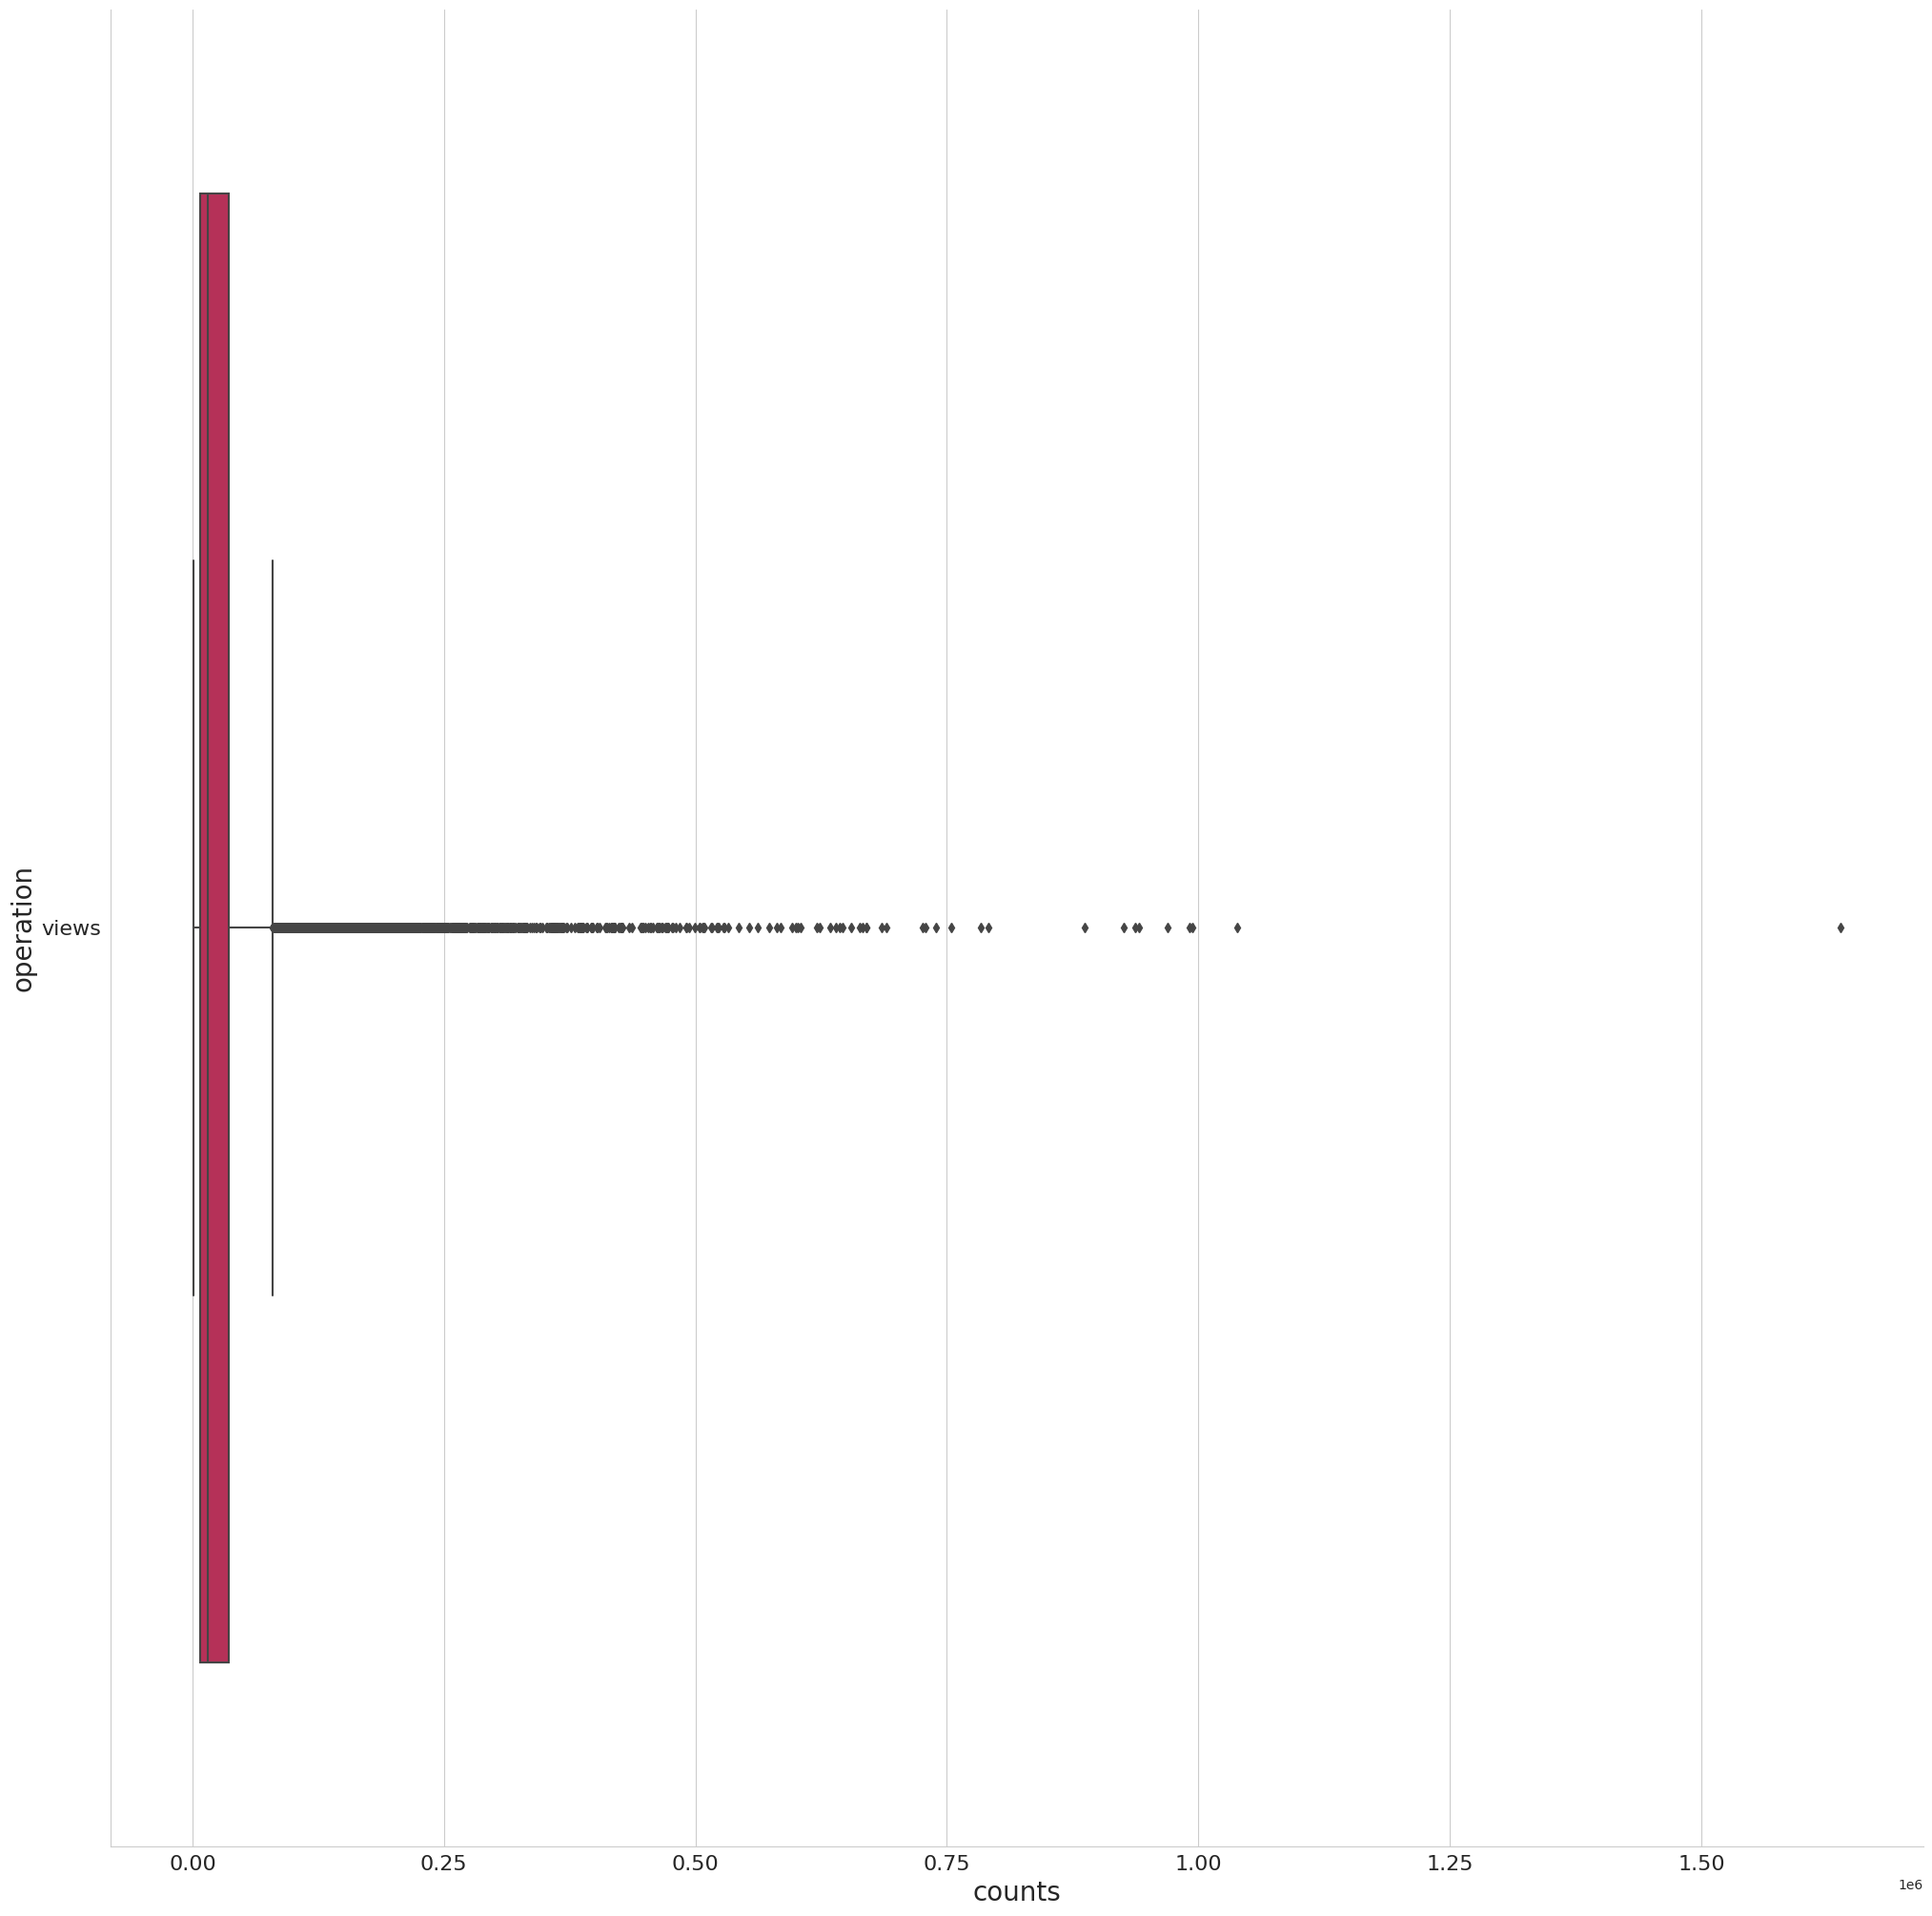

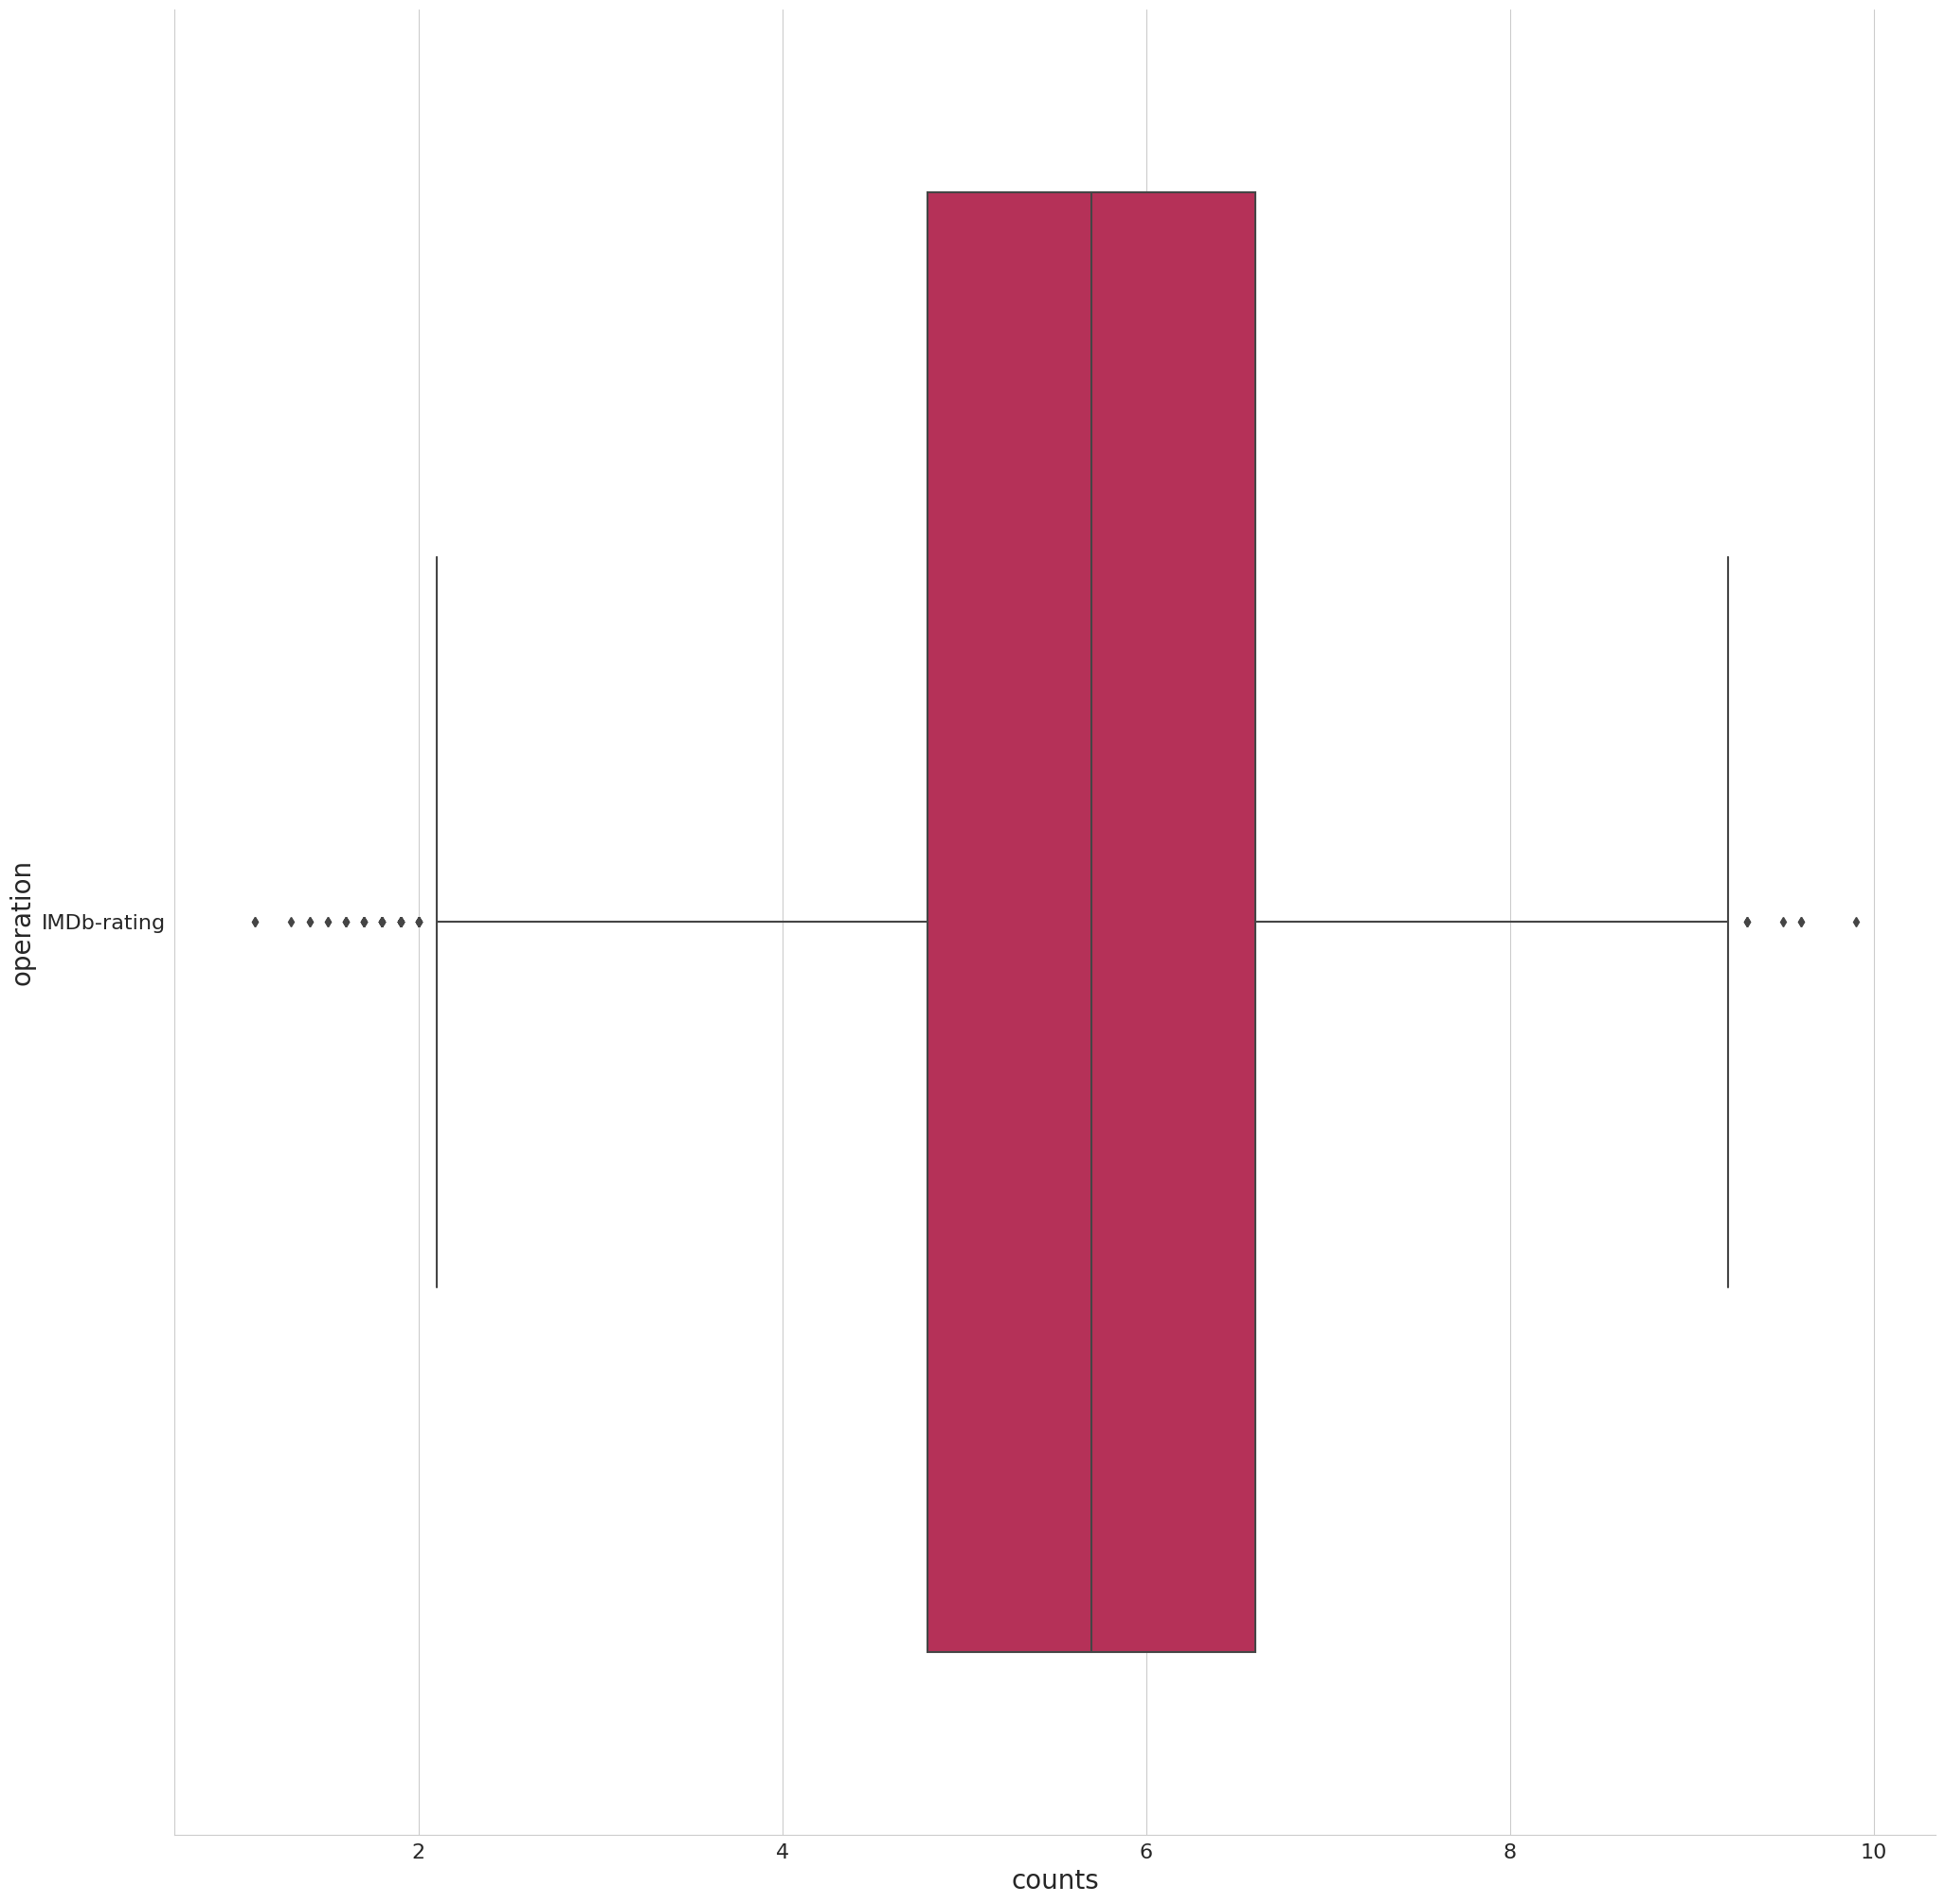

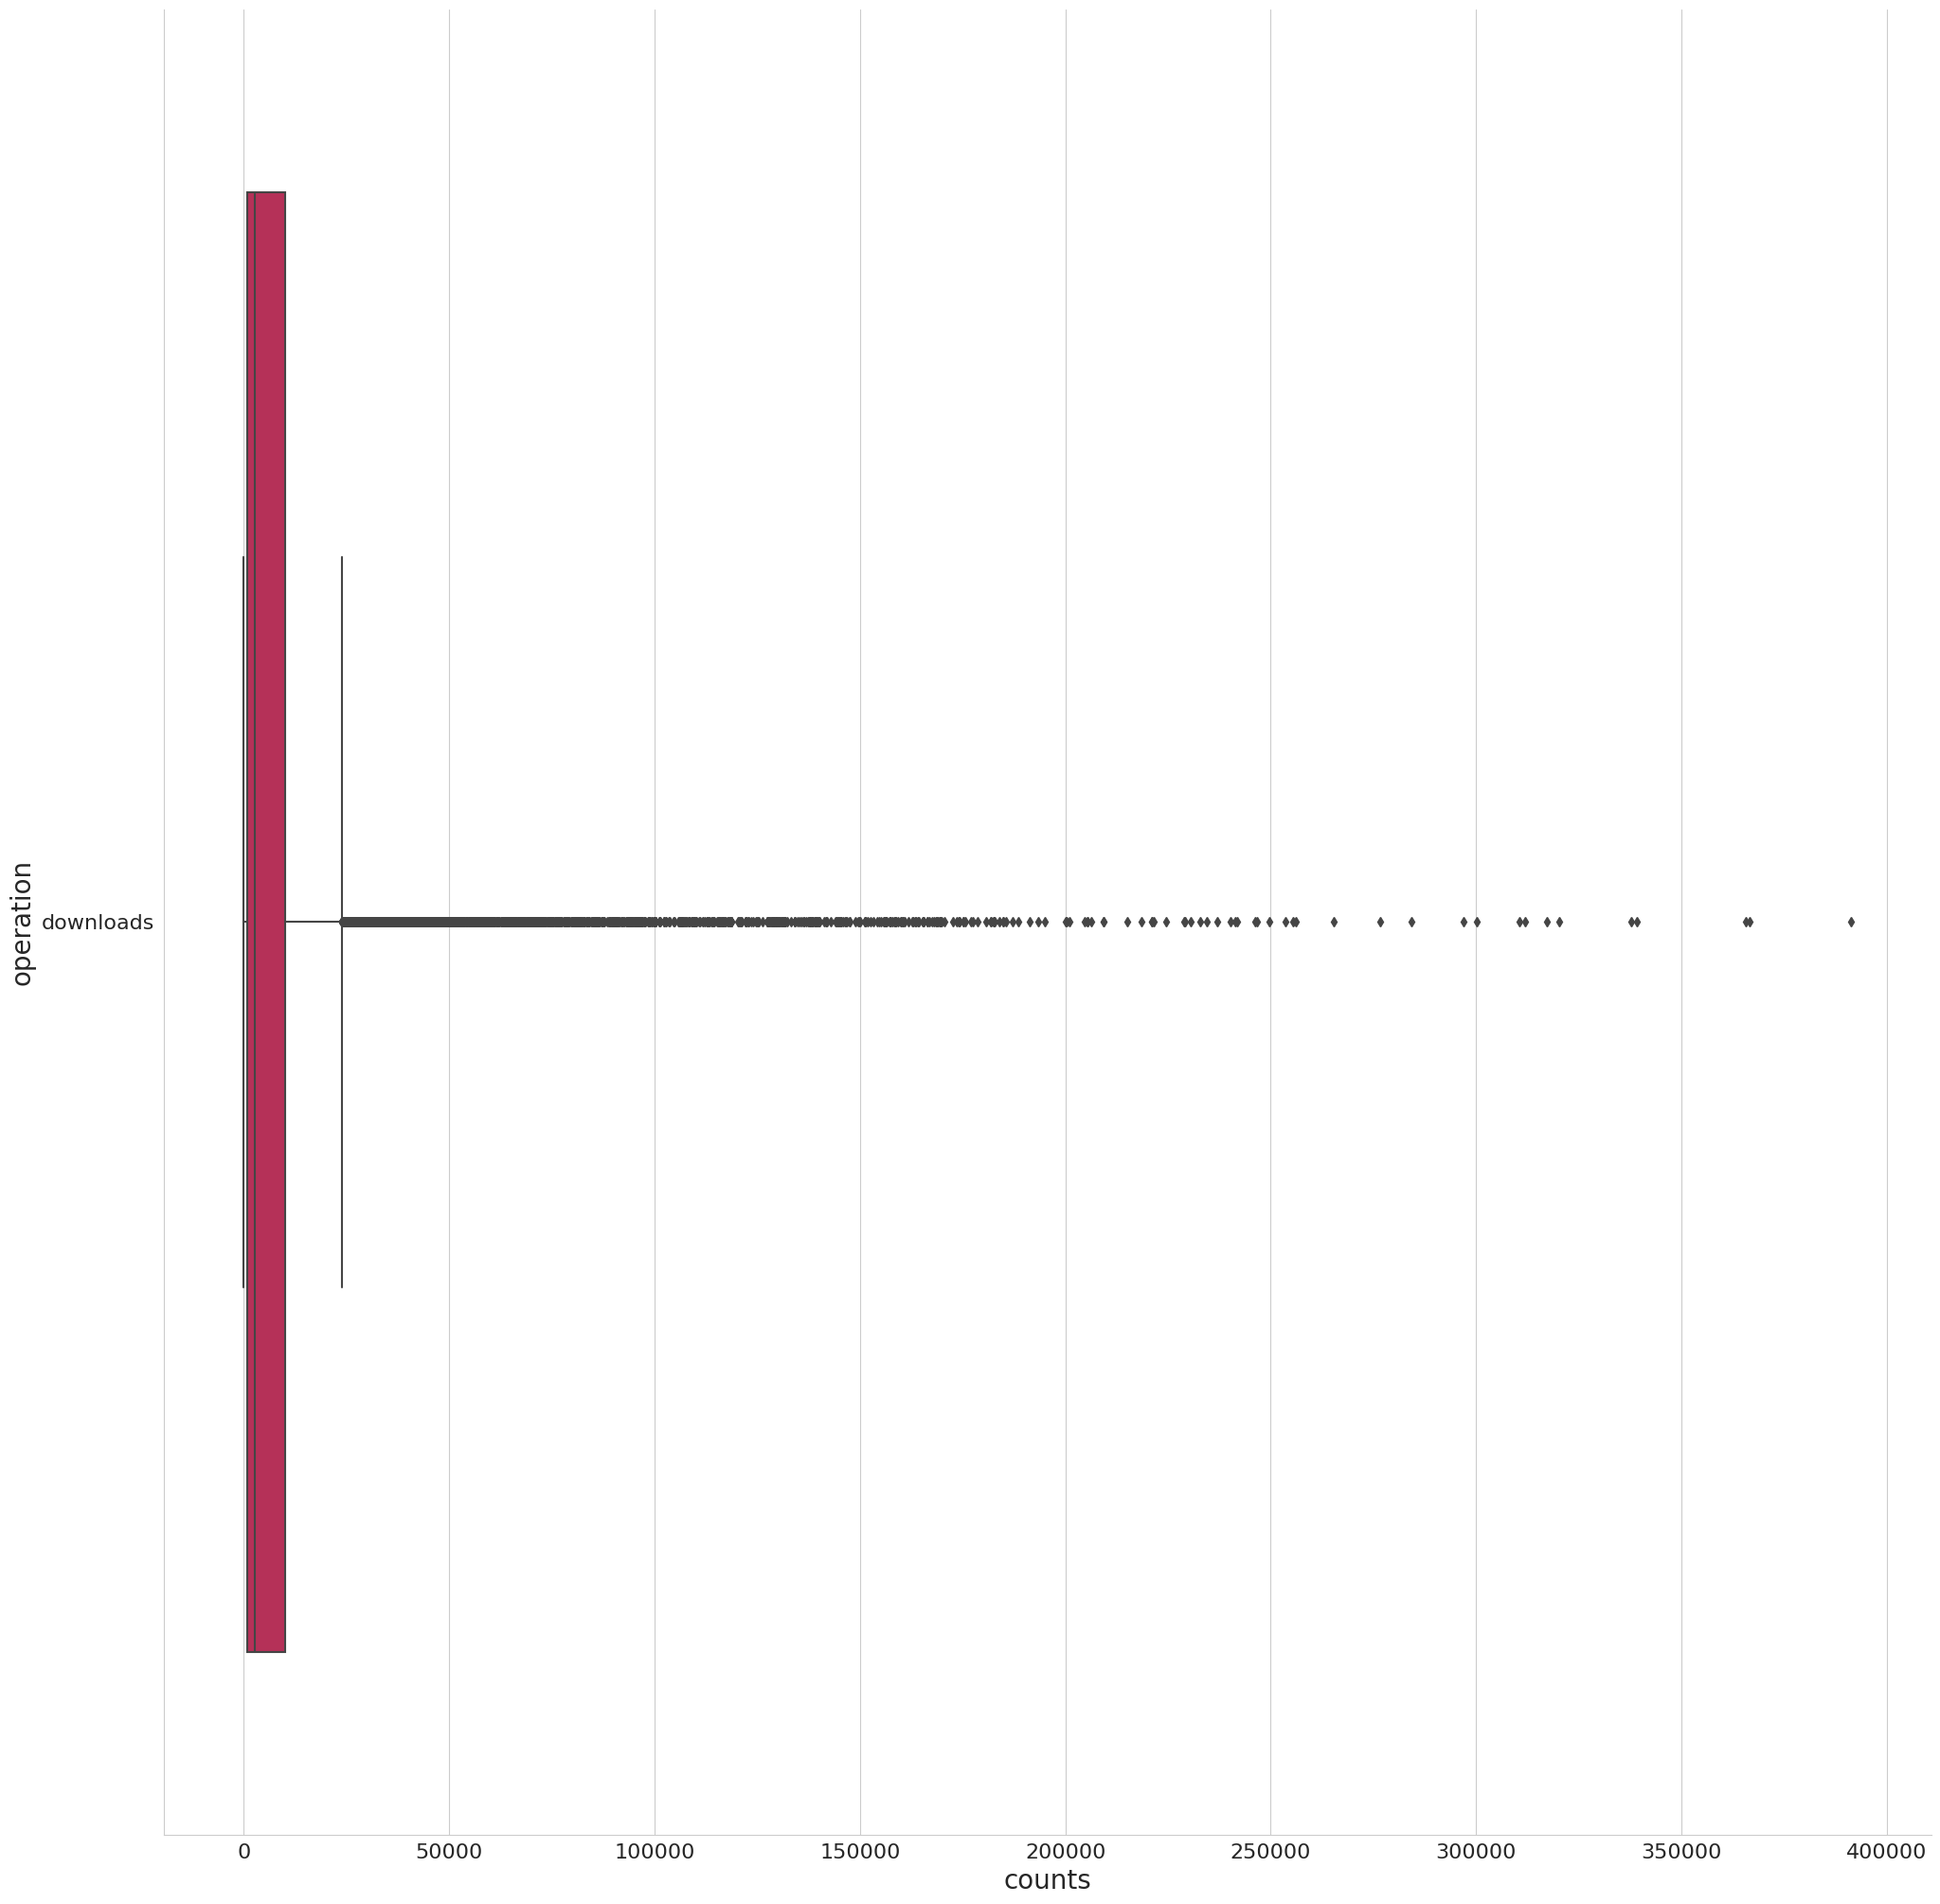

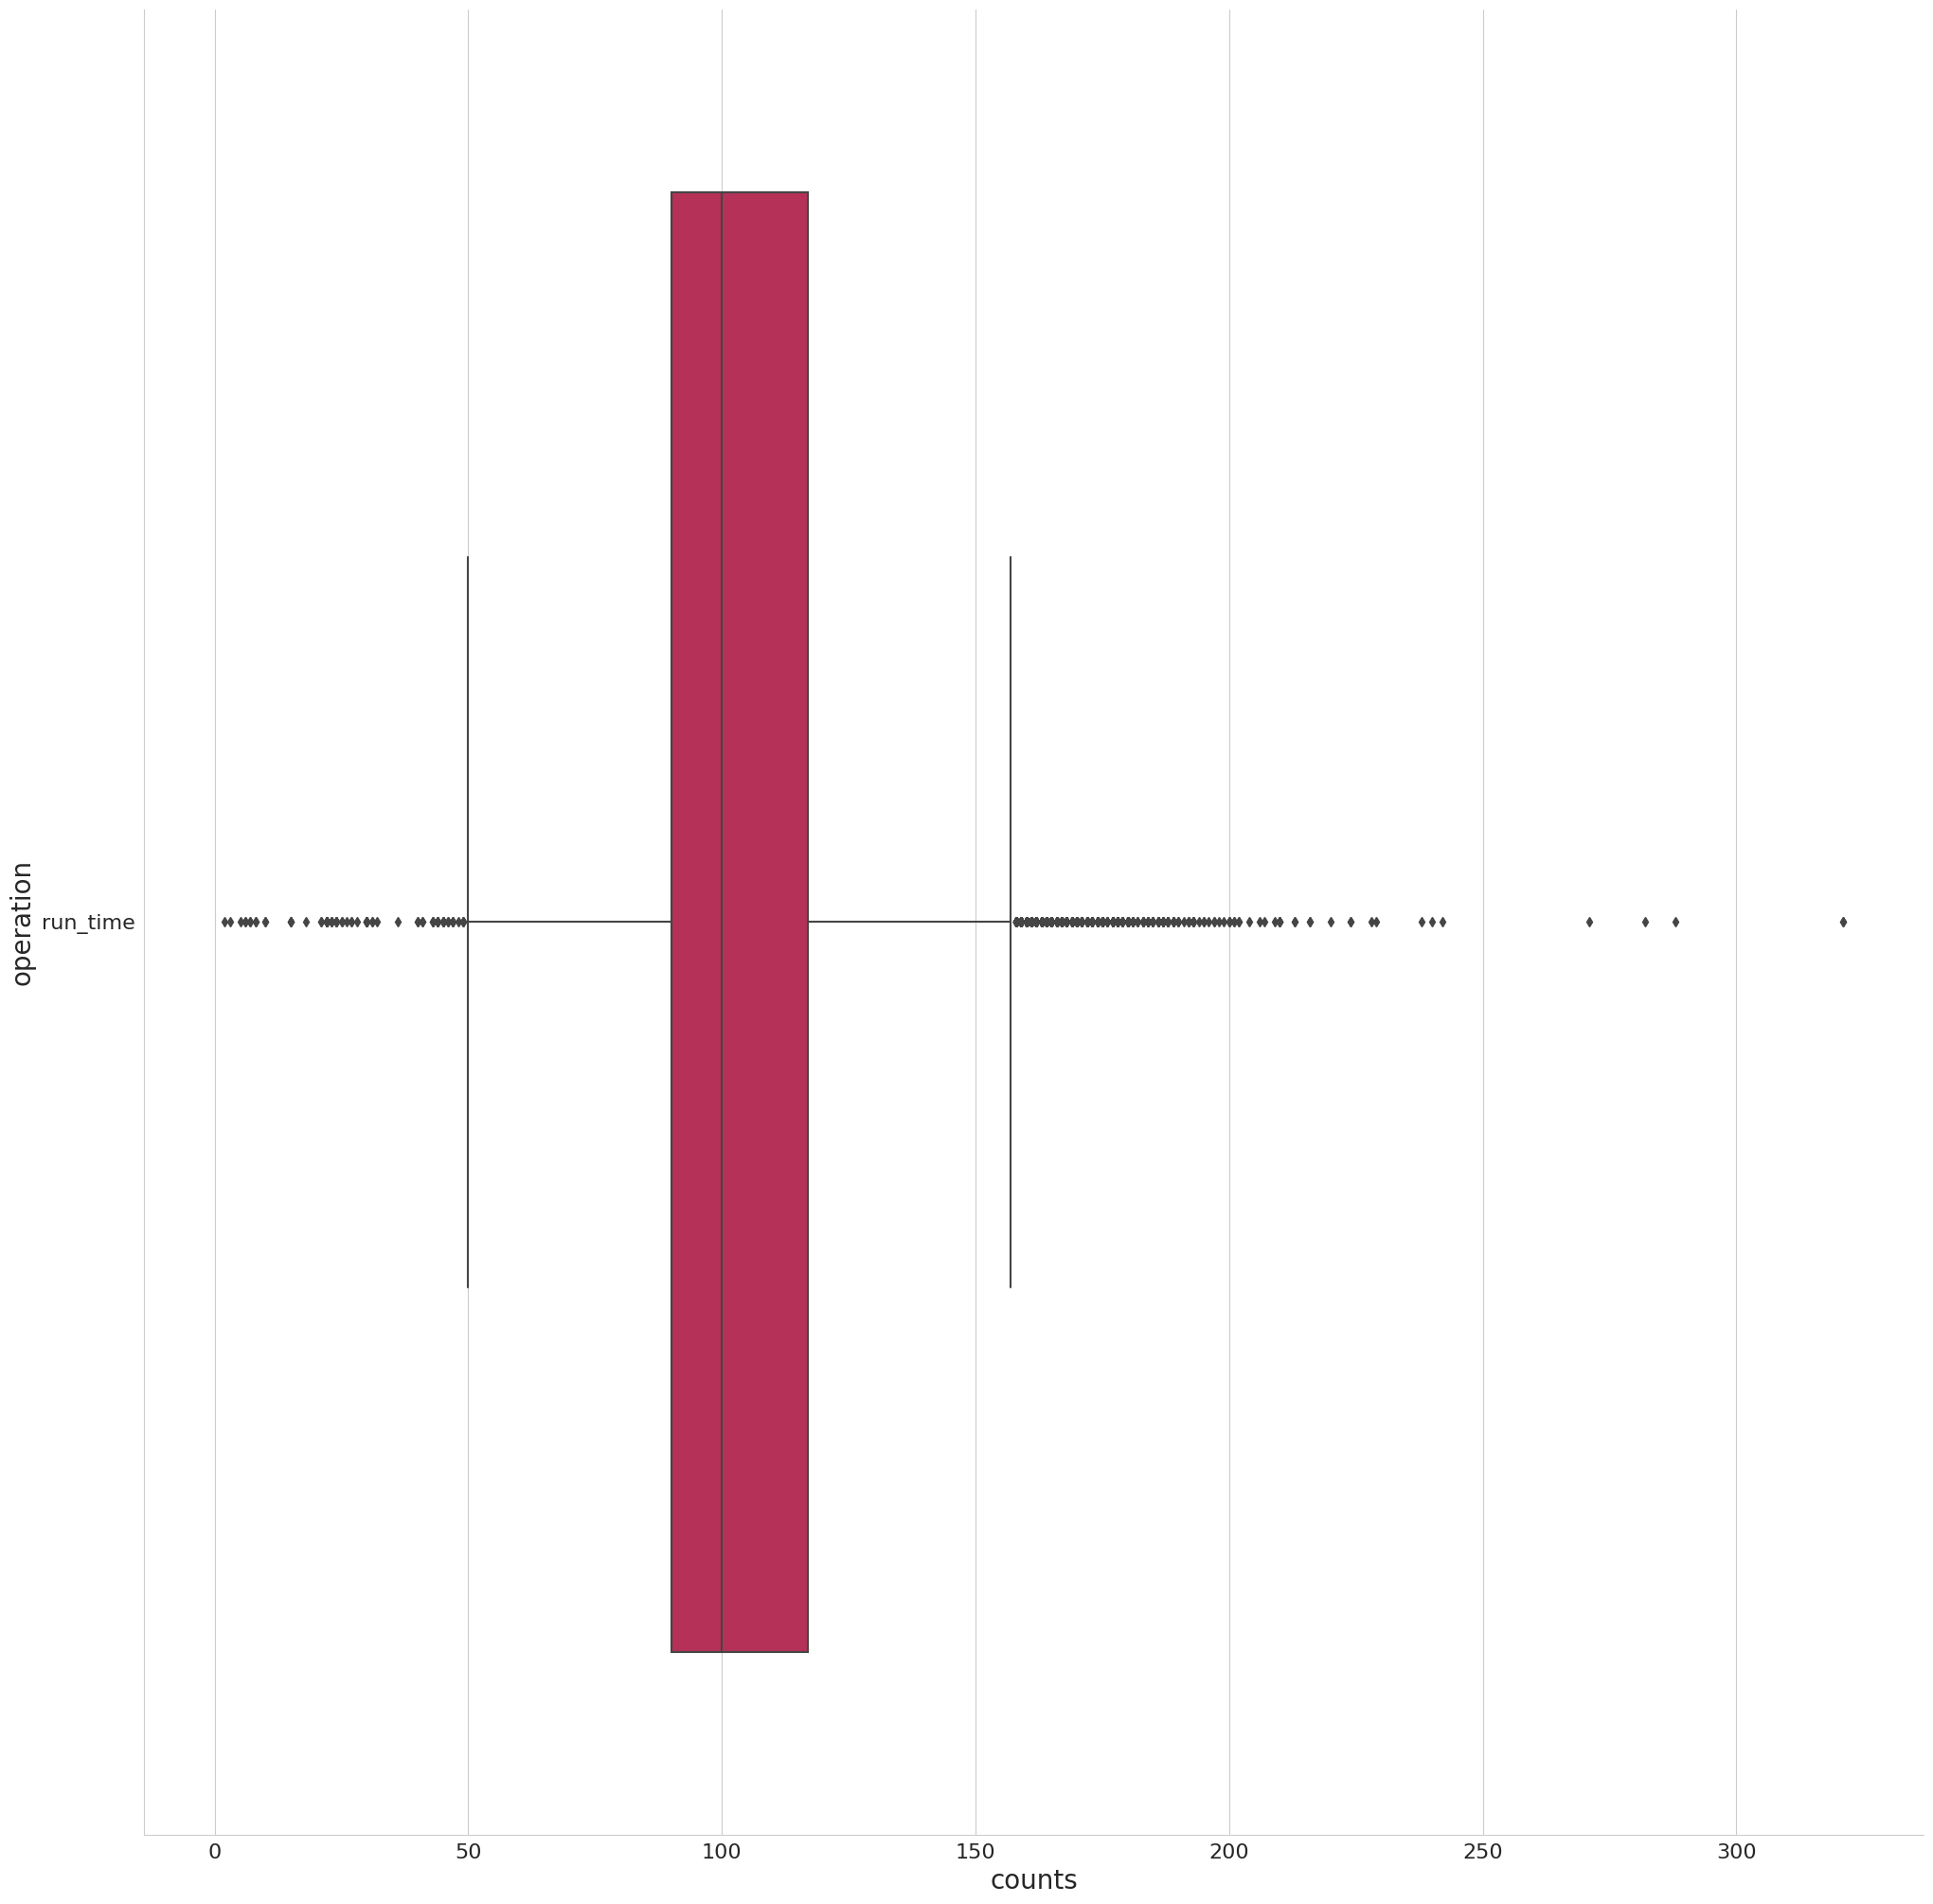

In [45]:
import seaborn as sns
# 对IMDb-rating downloads run_time views进行数值属性分析
# op_counts = pd.DataFrame(list(mov_data['views']), columns=['counts'])
# op_counts = pd.DataFrame(op_counts, columns=['operation', 'counts'])
# op_counts['operation'] = 'view'

for i in ['views','IMDb-rating','downloads','run_time']:
    t_counts = pd.DataFrame(list(mov_data[i]), columns=['counts'])
    t_counts = pd.DataFrame(t_counts, columns=['operation', 'counts'])
    t_counts['operation'] = i
    
    sns.set_style("whitegrid")
    operations_count_box = sns.catplot(data=t_counts, kind='box', y='operation', x='counts', height=20, palette='rocket')
    plt.yticks(fontsize=16)
    plt.xticks(fontsize=16)
    plt.ylabel('operation', fontsize=20)
    plt.xlabel('counts', fontsize=20)
    plt.show()

# 缺失值处理

使用删除缺失值的方式处理：

In [46]:
from numpy import nan as NA

mov_data_cleaned = mov_data.dropna()
mov_data_cleaned

,IMDb-rating,appropriate_for,director,downloads,id,industry,language,posted_date,release_date,run_time,storyline,title,views,writer
0,4.8,R,John Swab,304.0,372092,Hollywood / English,English,"20 Feb, 2023",Jan 28 2023,105.0,Doc\r\n facilitates a fragile truce between th...,Little Dixie,2794.0,John Swab
1,6.4,TV-PG,Paul Ziller,73.0,372091,Hollywood / English,English,"20 Feb, 2023",Feb 05 2023,84.0,Caterer\r\n Goldy Berry reunites with detectiv...,Grilling Season: A Curious Caterer Mystery,1002.0,John Christian Plummer
2,5.2,R,Ben Wheatley,1427.0,343381,Hollywood / English,"English,Hindi","20 Apr, 2021",Jun 18 2021,107.0,As the world searches for a cure to a disastro...,In the Earth,14419.0,Ben Wheatley
7,6.5,R,Benjamin Caron,1781.0,371751,Hollywood / English,English,"13 Feb, 2023",Feb 17 2023,116.0,"Motivations are suspect, and expectations are ...",Sharper,18225.0,"Brian Gatewood, Alessandro Tanaka"
8,6.9,PG-13,Ravi Kapoor,458.0,372042,Hollywood / English,English,"18 Feb, 2023",Dec 02 2022,80.0,An\r\n unmotivated South Asian American rapper...,Four Samosas,6912.0,Ravi Kapoor
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20522,7.1,Not Rated,Biren Nag,1932.0,23825,Bollywood / Indian,Hindi,"01 Jan, 1970",May 11 1962,158.0,"After a lusty Thakur rapes a young girl, she k...",Bees Saal Baad,6076.0,"Dhruva Chatterjee, Dev Kishan"
20525,7.0,G,Guy Hamilton,2544.0,25548,Hollywood / English,"English,German,Polish,French","01 Jan, 1970",Sep 17 1969,132.0,Historical reenactment of the air war in the e...,Battle of Britain,9319.0,"James Kennaway, Wilfred Greatorex, Derek Dempster"
20533,5.6,R,Barbara Topsøe-Rothenborg,12284.0,1173,Hollywood / English,"Spanish,German,English","26 May, 2016",Jan 01 1970,90.0,"LOVE AT FIRST HICCUP is a charming, innocent, ...",Love at First Hiccup,36022.0,"Barbara Topsøe-Rothenborg, Søren Frellesen, De..."
20537,7.1,Not Rated,Biren Nag,1932.0,23825,Bollywood / Indian,Hindi,"01 Jan, 1970",May 11 1962,158.0,"After a lusty Thakur rapes a young girl, she k...",Bees Saal Baad,6077.0,"Dhruva Chatterjee, Dev Kishan"


以languange和appropriate_for属性为例，展示删除前后的数据：

In [47]:

appropriate_count = pd.DataFrame(mov_data['appropriate_for'].value_counts()).rename(columns={'appropriate_for': 'appropriate_count'})
# appropriate_count.columns.values
appropriate_count.sort_values(by='count',ascending=False)

appropriate_count_cleaned = appropriate_count
appropriate_count_cleaned['appropriate_count_cleaned'] = [0] * len(appropriate_count)

for level in list(appropriate_count.index):
    if level in list(mov_data_cleaned['appropriate_for'].value_counts().index):
        appropriate_count_cleaned.loc[[level], ['appropriate_count_cleaned']] = \
        mov_data_cleaned['appropriate_for'].value_counts().loc[[level]].values[0]

appropriate_count_cleaned

,count,appropriate_count_cleaned
appropriate_for,,
R,4384,3873
Not Rated,2142,1938
PG-13,1968,1787
PG,886,771
TV-14,694,664
TV-MA,406,384
G,152,120
Unrated,132,122
TV-PG,115,88


In [48]:

language_count = pd.DataFrame(mov_data['language'].value_counts())
# appropriate_count.columns.values
language_count.sort_values(by='count',ascending=False)

language_count_cleaned = language_count
language_count_cleaned['language_count_cleaned'] = [0] * len(language_count)

for level in list(language_count.index):
    if level in list(mov_data_cleaned['language'].value_counts().index):
        language_count_cleaned.loc[[level], ['language_count_cleaned']] = \
        mov_data_cleaned['language'].value_counts().loc[[level]].values[0]

language_count_cleaned

,count,language_count_cleaned
language,,
English,12657,6110
Hindi,2558,724
"English,Spanish",391,312
Punjabi,310,34
"English,Hindi",304,270
...,...,...
"English,Korean,Spanish",1,1
"Norwegian,Swedish",1,0
"Spanish,Chinese,English,Maori,French",1,1


使用频率最高的取值代替所有缺失值（以appropriate_for属性为例，因为该属性缺失最多，处理效果最显著）

In [49]:
import copy
HF = {}
mov_data
mov_data_HF_replaced = copy.deepcopy(mov_data)
# mov_data_HF_replaced['IMDb-rating'].value_counts()
for col in mov_data_HF_replaced:
    HF[col] = mov_data_HF_replaced[col].value_counts().index[0]
HF['language'] = 'English'

HF

{'IMDb-rating': 6.6,
 'appropriate_for': 'R',
 'director': 'Venky Atluri',
 'downloads': 75.0,
 'id': '372090',
 'industry': 'Hollywood / English',
 'language': 'English',
 'posted_date': '13 Feb, 2023',
 'release_date': 'Jan 01 1970',
 'run_time': 90.0,
 'storyline': 'The life of a young man and his struggles against the privatization of education.',
 'title': 'The Girl Who Escaped: The Kara Robinson Story',
 'views': 6259.0,
 'writer': 'Nicholas Schutt'}

展示处理前后的appropriate_for数据差别

In [50]:
for col in mov_data_HF_replaced:
    mov_data_HF_replaced[col] = mov_data_HF_replaced[col].replace(NA, HF[col])
# mov_data_HF_replaced.isna().sum()
mov_data_HF_replaced.head(10)
mov_data_HF_replaced['appropriate_for'].value_counts()

appropriate_count = pd.DataFrame(mov_data['appropriate_for'].value_counts()).rename(columns={'appropriate_for': 'appropriate_count'})
# appropriate_count.columns.values
appropriate_count.sort_values(by='count',ascending=False)

appropriate_count_replaced = pd.DataFrame(mov_data_HF_replaced['appropriate_for'].value_counts()).\
rename(columns={'count': 'replaced_count'})
# appropriate_count.columns.values
appropriate_count_replaced.sort_values(by='replaced_count',ascending=False)

appropriate_count = pd.concat([appropriate_count,appropriate_count_replaced],axis=1)

appropriate_count


,count,replaced_count
appropriate_for,,
R,4384,13860
Not Rated,2142,2142
PG-13,1968,1968
PG,886,886
TV-14,694,694
TV-MA,406,406
G,152,152
Unrated,132,132
TV-PG,115,115


使用属性之间的相关性填补缺失值

我们可以猜测，appropriate_for属性可能与director, writer有关

Text(0.5, 1.0, 'Correlation Analysis')

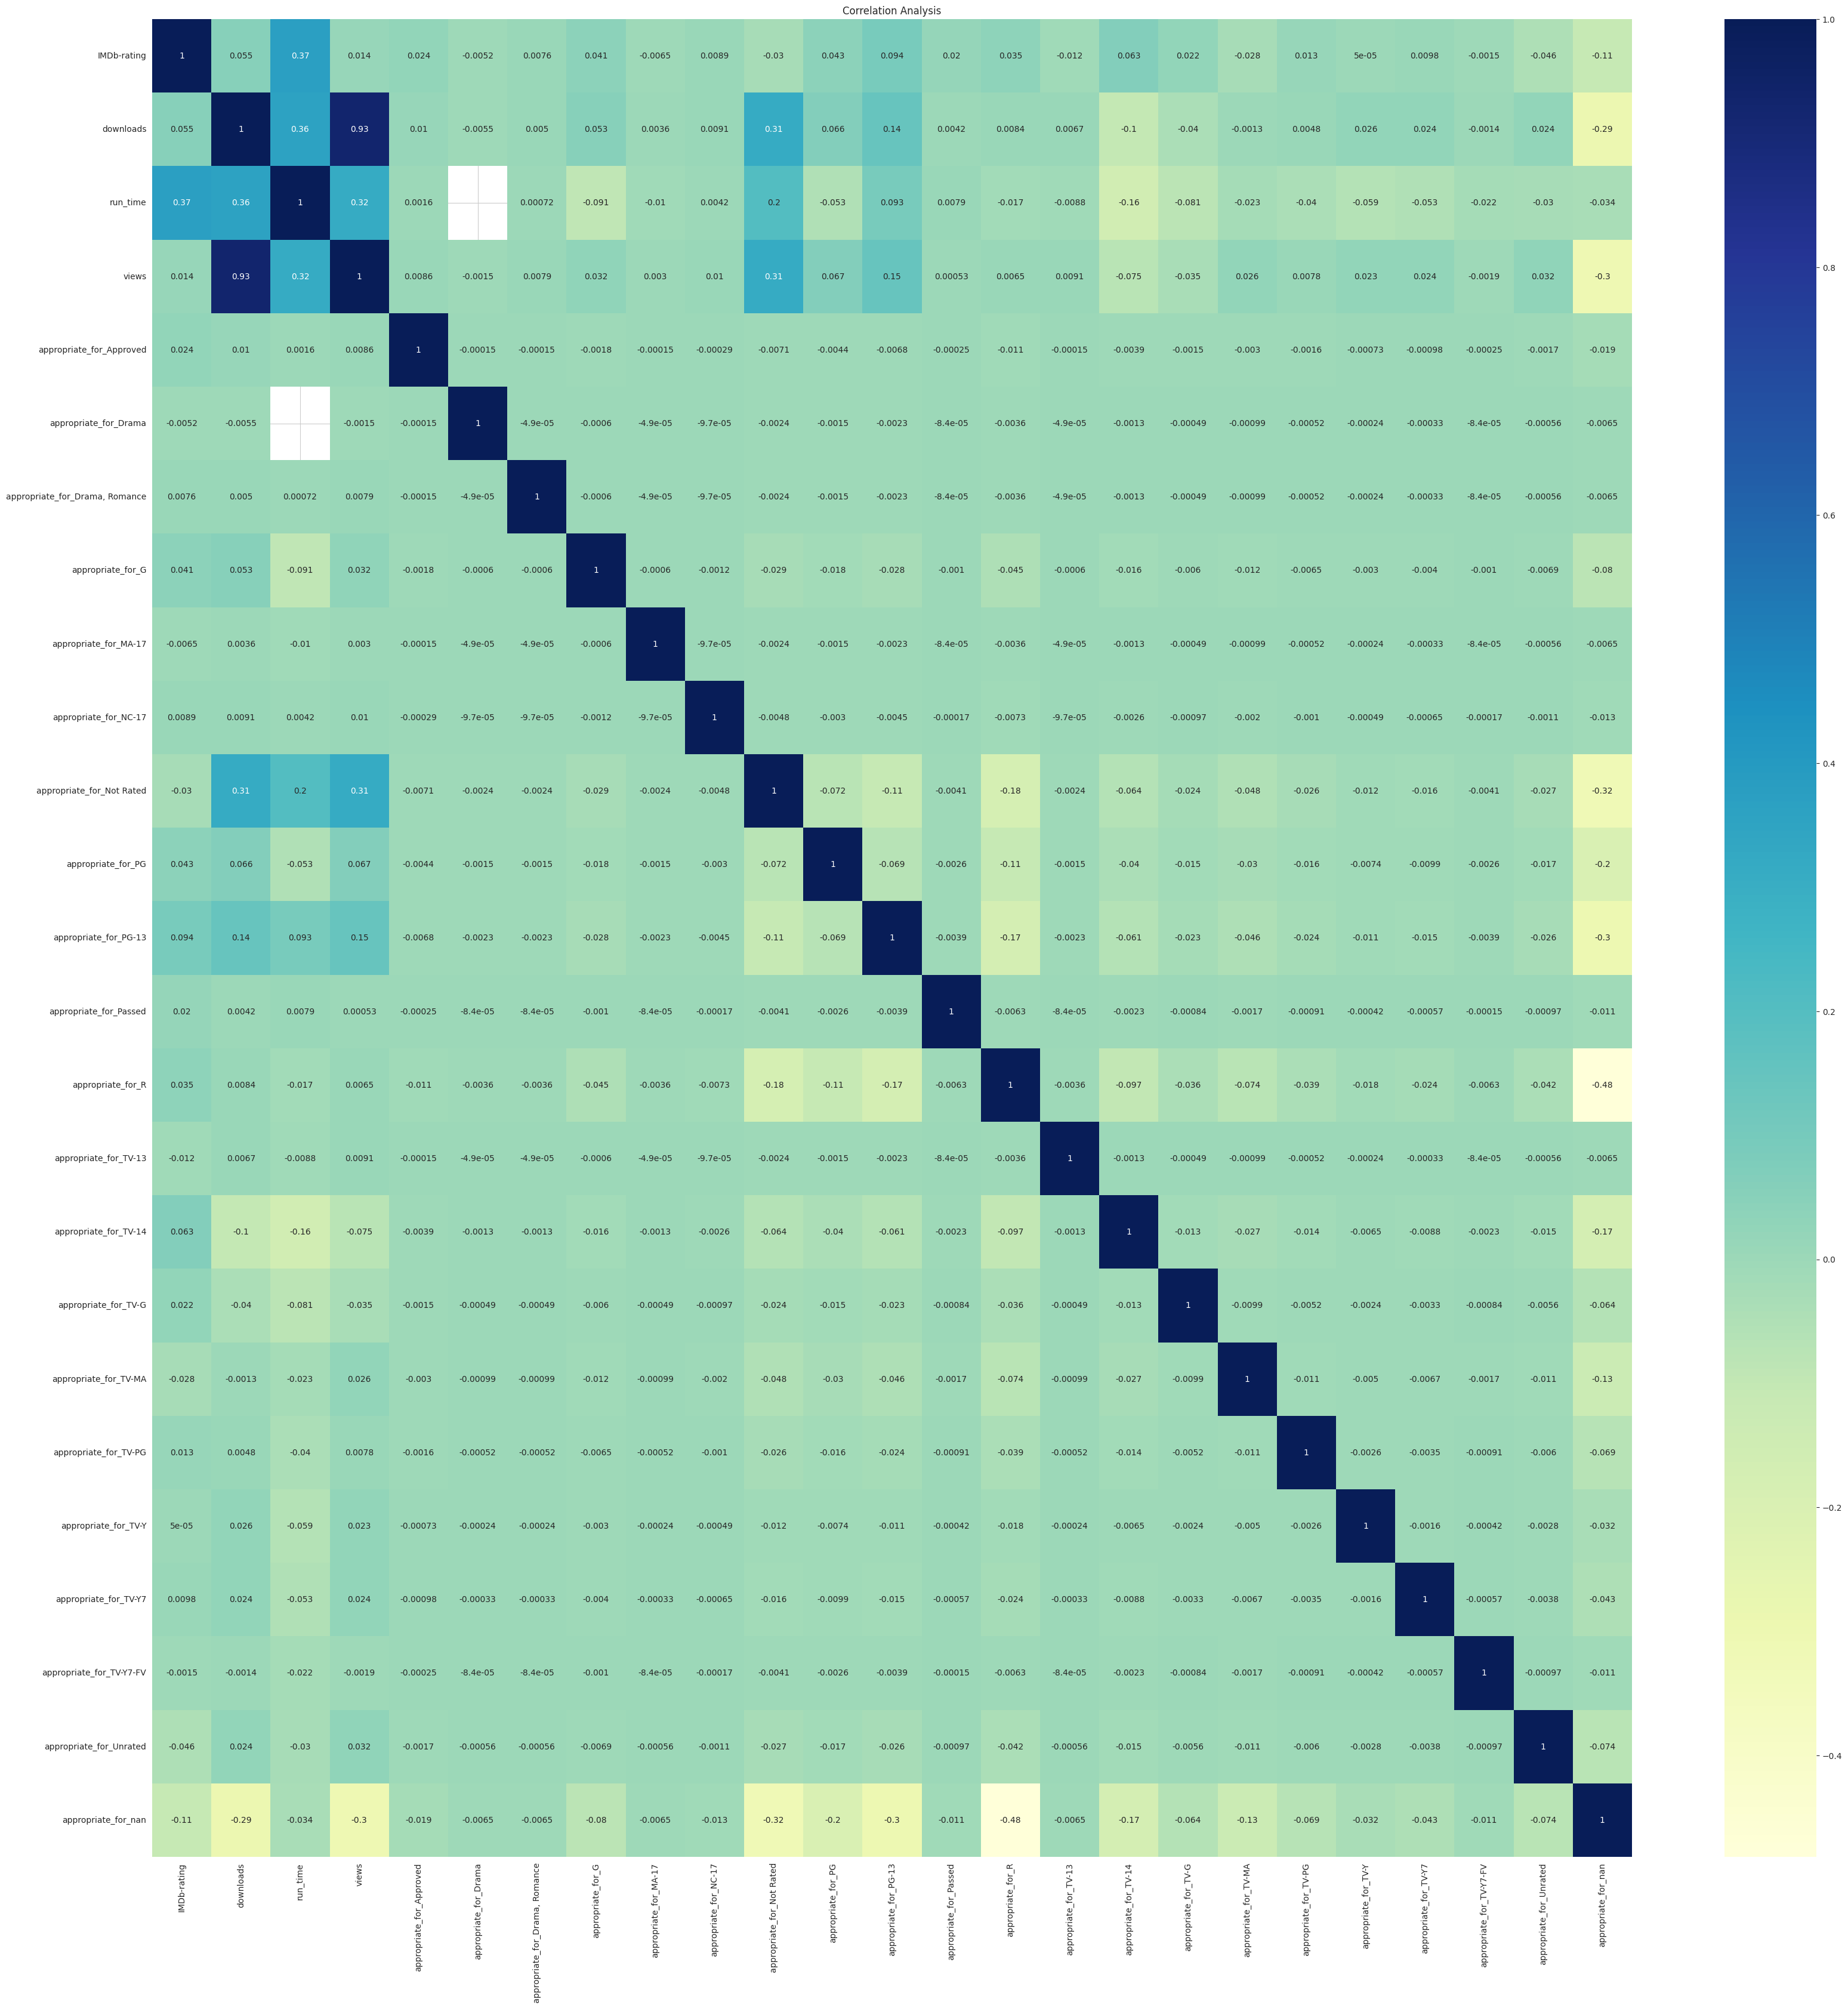

In [51]:
mov_data_attr_corr = copy.deepcopy(mov_data)
df_coded = pd.get_dummies(mov_data_attr_corr, columns=['appropriate_for'], dummy_na=True, drop_first=True)
# df_coded.head()
# df_coded.corr(method='spearman',numeric_only=True)

plt.figure(figsize=(40, 40))
sns.heatmap(df_coded.corr(method='spearman',numeric_only=True), cmap='YlGnBu', annot=True)
plt.title('Correlation Analysis')

依据上图可知，热力图中并没有出现一定数量的大于0.5的相关系数，可以认为并没有一个属性是与appropriate_for有显著联系的。现在采用IMDb-rating属性作为相关属性进行空值填充。

In [52]:
mov_data_attr_corr = copy.deepcopy(mov_data)
df1 = mov_data_attr_corr.groupby('appropriate_for').agg(avg=('IMDb-rating', 'mean'))
df1
df1.index
# mov_data_attr_corr = mov_data
# mov_data_attr_corr
for i in range(len(mov_data_attr_corr)):
    if mov_data_attr_corr.loc[i,'appropriate_for'] is NA:
        rate = mov_data_attr_corr.loc[i,'IMDb-rating']
        dist = []
        for j in df1.index:
            dist.append(abs(df1.loc[j,'avg']-rate))
        idx = dist.index(min(dist))
        mov_data_attr_corr.loc[i,'appropriate_for'] = df1.index[idx]
mov_data_attr_corr = mov_data_attr_corr['appropriate_for'].value_counts()
mov_data_attr_corr=mov_data_attr_corr.to_frame()
mov_data_attr_corr.columns.values
# mov_data_attr_corr
appropriate_count = pd.DataFrame(mov_data['appropriate_for'].value_counts())

appropriate_count.sort_values(by='count',ascending=False)
appropriate_count
mov_data_attr_corr=mov_data_attr_corr.rename(columns={'count':'repalced_count'})
mov_data_attr_corr = pd.concat([appropriate_count,mov_data_attr_corr],axis=1)

mov_data_attr_corr

,count,repalced_count
appropriate_for,,
R,4384,4579
Not Rated,2142,2357
PG-13,1968,2355
PG,886,886
TV-14,694,880
TV-MA,406,1266
G,152,484
Unrated,132,533
TV-PG,115,316


使用相关数据对象进行空值填充

采用唯一两个不存在空值的数值属性downloads和views，将其作为属性，appropriate_for作为标签，进行计算。具体地，通过计算每一个appropriate_for空值对应的（downloads, views）值对与其他appropriate_for非空值对应的（downloads, views）值对的距离，取距离最小的值对对应的appropriate_for值作为该空值填充。后面也展示了替换前后的属性频数变化。

In [1]:
mov_data_sample_corr = copy.deepcopy(mov_data)
def regularit(df):
    new_df = pd.DataFrame(index=df.index)
#     columns = ['IMDb-rating', 'downloads', 'views','run_time']
    columns = ['downloads', 'views']
    for c in columns:
        d = df[c]
        MAX = d.max()
        MIN = d.min()
        new_df[c] = ((d - MIN) / (d - MAX))
    return new_df

normal_mov_data = regularit(mov_data)

normal_appropriate = pd.concat([normal_mov_data, mov_data['appropriate_for']], axis=1)

infos = []
for i in range(len(normal_appropriate)):
    info = []
#     rate = normal_appropriate.loc[i,'IMDb-rating']
    download = normal_appropriate.loc[i,'downloads']
    view = normal_appropriate.loc[i,'views']
#     run = normal_appropriate.loc[i,'run_time']
#     info.append(rate)
    info.append(download)
    info.append(view)
#     info.append(run)
    infos.append(np.array(info))

len(infos)
for i in range(len(normal_appropriate)):
    if(i%100 == 0):
        print(i)
    if normal_appropriate.loc[i,'appropriate_for'] is NA:
        dists = []
        for j in range(len(infos)):
            dist = np.linalg.norm(infos[i] - infos[j])
#                 if ((infos[i][k] is not NA) and (infos[j][k] is not NA)):
#             dist = np.sqrt(np.sum(np.square(infos[i] - infos[j])))
            dists.append(dist)
        idx = dists.index(min(dists))
        mov_data_sample_corr.loc[i,'appropriate_for'] = mov_data_sample_corr.loc[idx,'appropriate_for']
mov_data_sample_corr['appropriate_for'].value_counts()

appropriate_count = pd.DataFrame(mov_data['appropriate_for'].value_counts())

appropriate_count.sort_values(by='count',ascending=False)
appropriate_count
mov_data_sample_corr=mov_data_attr_corr.rename(columns={'count':'repalced_count1'})
mov_data_sample_corr = pd.concat([appropriate_count,mov_data_sample_corr],axis=1)
mov_data_sample_corr1 = mov_data_sample_corr
mov_data_sample_corr1=mov_data_sample_corr1.drop(columns='repalced_count1')
mov_data_sample_corr1

NameError: name 'infos' is not defined